In [1]:
from sage.all import *
x, y, t = var('x, y, t')

In [2]:
H = (1 - x - y) * (3*x + y - 1)
sols = solve([H, x*H.diff(x) - t*y*H.diff(y)], [x, y], solution_dict=True)
sols # amoeba contour equations (single points on the contour do not show up in the image)

[{x: t/(t + 1), y: 1/(t + 1)}, {x: 0, y: 1}, {x: 1/3*t/(t + 1), y: 1/(t + 1)}]

critical points: [{x: 1/2, y: 1/2}, {x: 0, y: 1}, {x: 1/6, y: 1/2}]
verbose 0 (3838: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 200 points.
verbose 0 (3838: plot.py, generate_plot_points) Last error message: 'Unable to compute f(100.0)'


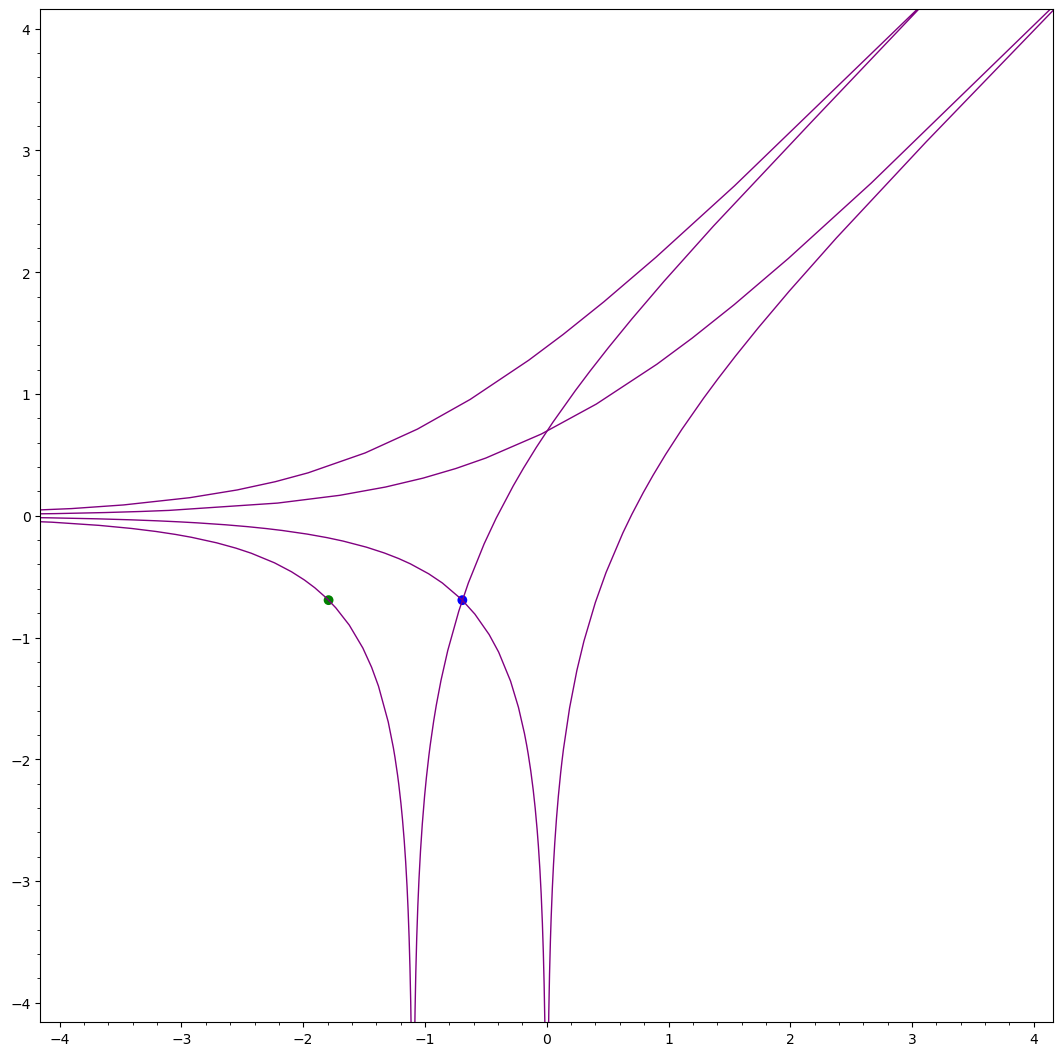

In [3]:
colors = ['blue', 'red', 'green', 'yellow']

critical_points = solve([H, x*H.diff(x) - y*H.diff(y)], [x, y], solution_dict=True)
print('critical points:', critical_points)

p = sum([
  parametric_plot((log(abs(f[x])), log(abs(f[y]))), (t, -100, 100), color='purple')
  for j, f in enumerate(sols)
])

# NOTE the red critical point is at log(0) in x-coord, so doesn't appear in plot
p += sum([
  point((log(abs(p[x])), log(abs(p[y]))), color=colors[j%len(colors)], size=50)
  for j, p in enumerate(critical_points)
])

size = 4
p.show(frame=True, axes=False, xmin=-size, xmax=size, ymin=-size, ymax=size, figsize=16)

In [4]:
y_params = solve(H, y)
x_params = solve(H, x)
y_params, x_params

([y == -3*x + 1, y == -x + 1], [x == -1/3*y + 1/3, x == -y + 1])

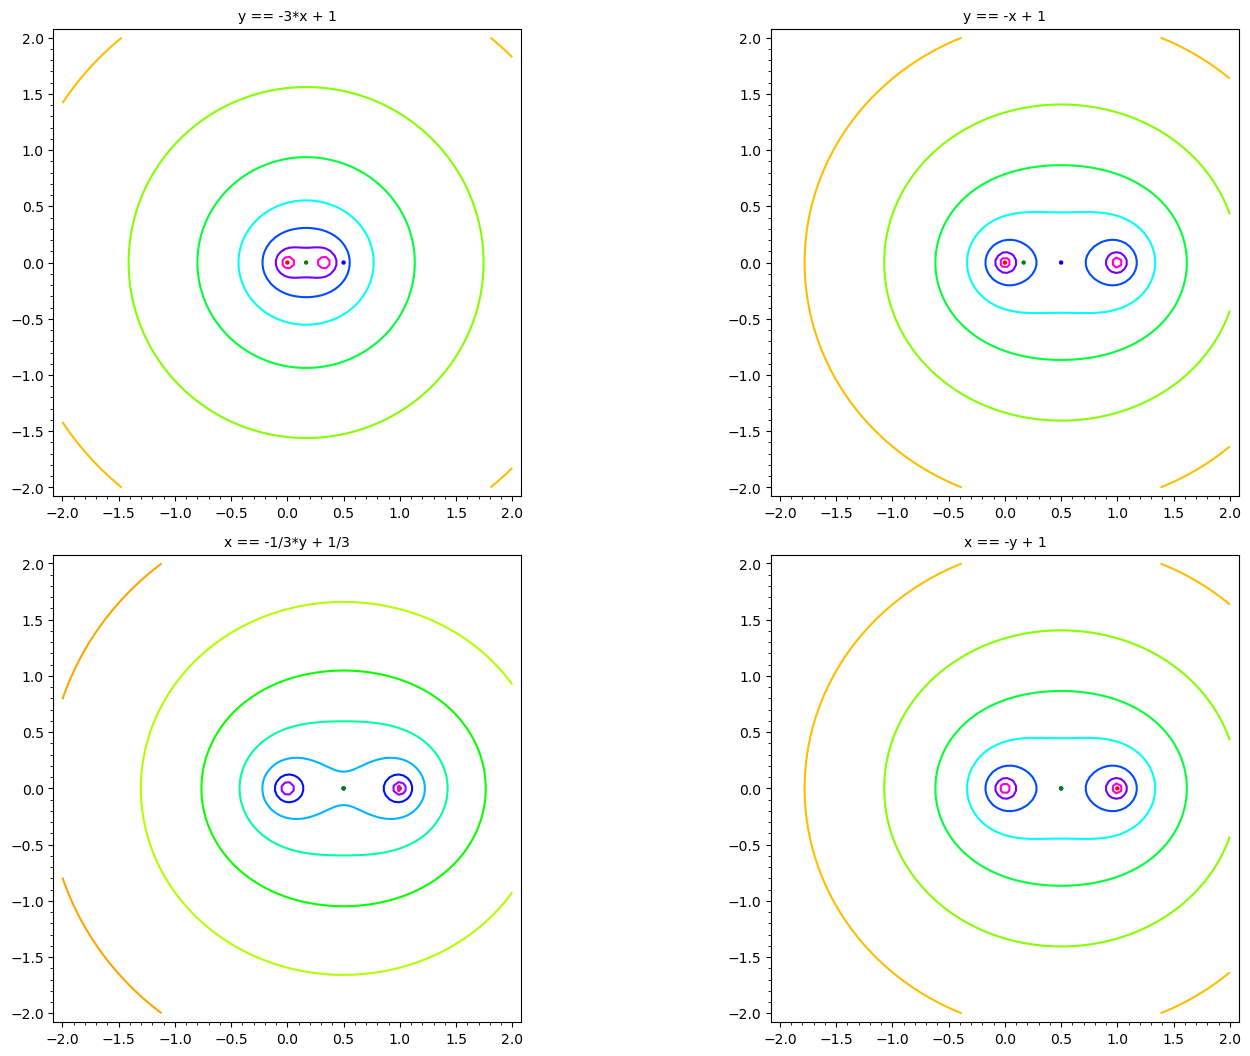

In [5]:
def mag(z): # using abs() doesnt work for some reason
  return sqrt(real(z)**2 + imag(z)**2)

# height function
h = - log(mag(x)) - log(mag(y))

# parameterized plots
size = 2
a, b = var('a, b')

x_plots = [
  contour_plot(h(y=param.rhs())(x=a+1j*b), (-size, size), (-size, size), title=param, fill=False, cmap='hsv')
  for param in y_params
]

y_plots = [
  contour_plot(h(x=param.rhs())(y=a+1j*b), (-size, size), (-size, size), title=param, fill=False, cmap='hsv')
  for param in x_params
]

x_plots = [
  plot + sum([
    point((real(p[x]), imag(p[x])), color=colors[j%len(colors)])
    for j, p in enumerate(critical_points)
  ])
  for plot in x_plots
]

y_plots = [
  plot + sum([
    point((real(p[y]), imag(p[y])), color=colors[j%len(colors)])
    for j, p in enumerate(critical_points)
  ])
  for plot in y_plots
]

# NOTE the green and blue critical points have the same y-coord
graphics_array([x_plots, y_plots]).show(frame=True, axes=False, figsize=16)